In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import re
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
datos=pd.DataFrame(pd.read_csv('https://docs.google.com/spreadsheets/d/152zjALL7JIbeaMbg5FZ9oW97X7D2ZAwtQcmc2GPtRUQ/gviz/tq?tqx=out:csv'))

In [ ]:
datos.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,audience,audience:confidence,bias,bias:confidence,message,message:confidence,orig__golden,audience_gold,bias_gold,bioid,embed,id,label,message_gold,source,text
0,766192484,False,finalized,1,8/4/15 21:17,national,1.0,partisan,1.0,policy,1.0,NaN,NaN,NaN,R000596,"<blockquote class=""twitter-tweet"" width=""450"">...","3,83E+22",From: Trey Radel (Representative from Florida),NaN,twitter,RT @nowthisnews: Rep. Trey Radel (R- #FL) slam...
1,766192485,False,finalized,1,8/4/15 21:20,national,1.0,partisan,1.0,attack,1.0,NaN,NaN,NaN,M000355,"<blockquote class=""twitter-tweet"" width=""450"">...","3,11E+22",From: Mitch McConnell (Senator from Kentucky),NaN,twitter,VIDEO - #Obamacare: Full of Higher Costs and ...
2,766192486,False,finalized,1,8/4/15 21:14,national,1.0,neutral,1.0,support,1.0,NaN,NaN,NaN,S001180,"<blockquote class=""twitter-tweet"" width=""450"">...","3,39E+22",From: Kurt Schrader (Representative from Oregon),NaN,twitter,Please join me today in remembering our fallen...
3,766192487,False,finalized,1,8/4/15 21:08,national,1.0,neutral,1.0,policy,1.0,NaN,NaN,NaN,C000880,"<blockquote class=""twitter-tweet"" width=""450"">...","2,99E+22",From: Michael Crapo (Senator from Idaho),NaN,twitter,RT @SenatorLeahy: 1st step toward Senate debat...
4,766192488,False,finalized,1,8/4/15 21:26,national,1.0,partisan,1.0,policy,1.0,NaN,NaN,NaN,U000038,"<blockquote class=""twitter-tweet"" width=""450"">...","4,08E+22",From: Mark Udall (Senator from Colorado),NaN,twitter,.@amazon delivery #drones show need to update ...


In [ ]:
datos['_unit_state'].unique()

array(['finalized'], dtype=object)

In [ ]:
len(datos['_golden'].unique())

1

In [ ]:
for columna in datos.columns:
  if len(datos[columna].unique())==1:
    print(columna, "==>", datos[columna].unique())
    datos.drop([columna], axis=1, inplace=True)

_golden ==> [False]
_unit_state ==> ['finalized']
orig__golden ==> [nan]
audience_gold ==> [nan]
bias_gold ==> [nan]
message_gold ==> [nan]


In [ ]:
datos.drop(['_last_judgment_at'], axis=1, inplace=True)

In [ ]:
nltk.download('stopwords')
stopwords_sp = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stopwords_sp

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

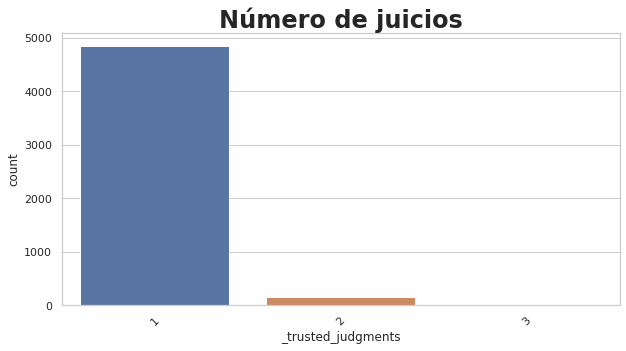

In [ ]:
# columna 1
sns.countplot(x='_trusted_judgments', data=datos, order=datos['_trusted_judgments'].value_counts().index)
plt.title('Número de juicios', weight='bold', size=24, y=1)
plt.gcf().set_size_inches(10, 5)
plt.xticks(rotation=45)
plt.show()

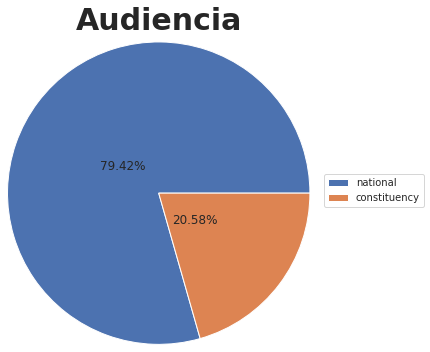

In [ ]:
#columna 2

plt.gca().axis("equal")
pie = plt.pie(datos['audience'].value_counts(), startangle=0, autopct='%1.2f%%', pctdistance=0.3, radius=2.5)
labels=datos['audience'].unique()
plt.title('Audiencia', weight='bold', size=30, y=1.2)
plt.legend(pie[0], labels, bbox_to_anchor=(0.8,0.5), loc="center right", fontsize=10, 
          bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.35)

plt.show()
plt.clf()
plt.close()

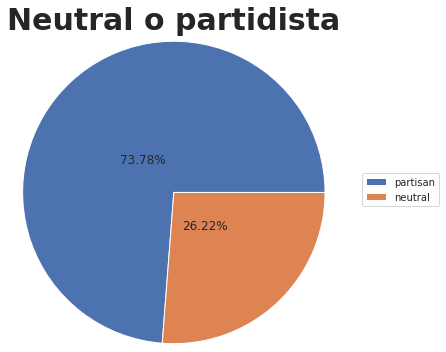

In [ ]:
#columna 4

plt.gca().axis("equal")
pie = plt.pie(datos['bias'].value_counts(), startangle=0, autopct='%1.2f%%', pctdistance=0.3, radius=2.5)
labels=datos['bias'].unique()
plt.title('Neutral o partidista', weight='bold', size=30, y=1.2)
plt.legend(pie[0], labels, bbox_to_anchor=(.8,0.5), loc="center right", fontsize=10, 
          bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.35)

plt.show()
plt.clf()
plt.close()

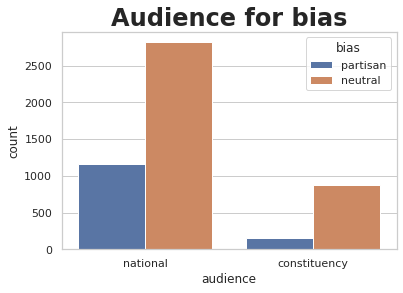

In [ ]:
#columna 2 y 4
sns.countplot(x='audience',data=datos, hue='bias')
plt.title('Audience for bias', weight='bold', size=24, y=1)
plt.show()

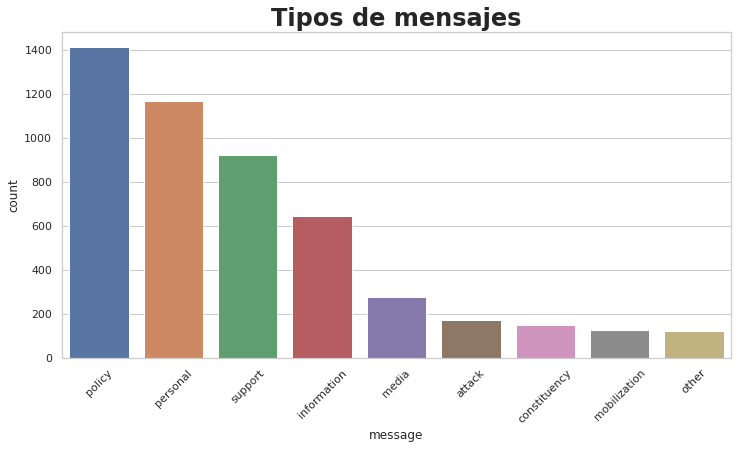

In [ ]:
#Columna 6 - message
sns.countplot(x='message', data=datos, order=datos['message'].value_counts().index)
plt.title('Tipos de mensajes', weight='bold', size=24, y=1)
plt.gcf().set_size_inches(12, 6)
plt.xticks(rotation=45)
plt.show()

In [ ]:
spanishStemmer=SnowballStemmer("english")


### Realizar la limpieza de los datos y guardarlos en la columna ''No_Stop'

In [ ]:
datos['No_Stop']=""

In [ ]:
cadena=""
for i in range(0, len(datos['text'])):
    dep=datos['text'][i]            # Guardar el contenido de la celda en la variable dep
    dep=dep.lower()                 # Comverti a minuscula
    dep=dep.split()                 # Generar un array con las palabras de cada tweet
    for palabra in dep:             #Recorrer el array
      if palabra.startswith('http') or '&amp' in palabra:# Identificar los links buscando las palabras que empiezan por "http", 
                                                         # También las palabras que contienen '&amp' que es un '&' mal codificado para borrarlas
        index=dep.index(palabra)    #Captura el indice donde se encuentra el link
        dep.pop(index)              #Borrar el link
    dep=' '.join(dep)               #Volver a generar un string con las palabras
    dep=re.sub(r"[^a-zA-Z'@#\s]", " ", dep) # Dejar solo letras
    dep=dep.split()                 # crear array con las palabras
    texto=[palabra for palabra in dep if palabra not in stopwords_sp] # Eliminar palabras vacias
    for ele in texto:
        ele=spanishStemmer.stem(ele) #Realizar stemming a las palabras
        espacio=" "
        cadena += espacio
        cadena += ele      
    datos['No_Stop'][i]=cadena
    cadena=""

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
datos['No_Stop'][0]

' rt @nowthisnew rep trey radel r #fl slam #obamacar #polit'

In [ ]:
datos['Usuario@'] = ''
datos['Etiqueta#'] = ''


In [ ]:
cadena=""
for i in range(0, len(datos['No_Stop'])):
    dep=datos['No_Stop'][i] # Guardar el contenido de la celda en la variable dep
    dep=dep.split() # crear array con las palabras
    texto=[palabra for palabra in dep if palabra.startswith('@') ] # Eliminar palabras vacias
    for ele in texto:
        espacio=" "
        cadena += espacio
        cadena += ele      
    datos['Usuario@'][i]=cadena
    cadena=""

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
cadena=""
for i in range(0, len(datos['No_Stop'])):
    dep=datos['No_Stop'][i] # Guardar el contenido de la celda en la variable dep
    dep=dep.split() # crear array con las palabras
    texto=[palabra for palabra in dep if palabra.startswith('#') ] # Eliminar palabras vacias
    for ele in texto:
        espacio=" "
        cadena += espacio
        cadena += ele      
    datos['Etiqueta#'][i]=cadena
    cadena=""

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
datos['No_Stop1']=''

In [ ]:
cadena=""
for i in range(0, len(datos['No_Stop'])):
    dep=datos['No_Stop'][i] # Guardar el contenido de la celda en la variable dep
    dep=dep.split() # crear array con las palabras
    texto=[palabra for palabra in dep if not palabra.startswith('#') and not palabra.startswith('@')] # Eliminar palabras vacias
    for ele in texto:
        espacio=" "
        cadena += espacio
        cadena += ele      
    datos['No_Stop1'][i]=cadena
    cadena=""

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
datos.head()

,_unit_id,_trusted_judgments,audience,audience:confidence,bias,bias:confidence,message,message:confidence,bioid,embed,id,label,source,text,No_Stop,Usuario@,Etiqueta#,No_Stop1
0,766192484,1,national,1.0,partisan,1.0,policy,1.0,R000596,"<blockquote class=""twitter-tweet"" width=""450"">...","3,83E+22",From: Trey Radel (Representative from Florida),twitter,RT @nowthisnews: Rep. Trey Radel (R- #FL) slam...,rt @nowthisnew rep trey radel r #fl slam #oba...,@nowthisnew,#fl #obamacar #polit,rt rep trey radel r slam
1,766192485,1,national,1.0,partisan,1.0,attack,1.0,M000355,"<blockquote class=""twitter-tweet"" width=""450"">...","3,11E+22",From: Mitch McConnell (Senator from Kentucky),twitter,VIDEO - #Obamacare: Full of Higher Costs and ...,video #obamacar full higher cost broken promis,,#obamacar,video full higher cost broken promis
2,766192486,1,national,1.0,neutral,1.0,support,1.0,S001180,"<blockquote class=""twitter-tweet"" width=""450"">...","3,39E+22",From: Kurt Schrader (Representative from Oregon),twitter,Please join me today in remembering our fallen...,pleas join today rememb fallen hero honor men...,,,pleas join today rememb fallen hero honor men...
3,766192487,1,national,1.0,neutral,1.0,policy,1.0,C000880,"<blockquote class=""twitter-tweet"" width=""450"">...","2,99E+22",From: Michael Crapo (Senator from Idaho),twitter,RT @SenatorLeahy: 1st step toward Senate debat...,rt @senatorleahi st step toward senat debat l...,@senatorleahi,#vawa,rt st step toward senat debat leahi crapo bil...
4,766192488,1,national,1.0,partisan,1.0,policy,1.0,U000038,"<blockquote class=""twitter-tweet"" width=""450"">...","4,08E+22",From: Mark Udall (Senator from Colorado),twitter,.@amazon delivery #drones show need to update ...,@amazon deliveri #drone show need updat law p...,@amazon,#drone #innov #privaci #ua,deliveri show need updat law promot protect bill


In [ ]:
datos.to_csv('datos.csv')

#### Comparar el texto original con el pre-procesado

In [ ]:
print(datos['text'][10],"\n", datos['No_Stop1'][10])

As POTUS golfs, pushes amnesty &amp; ignores Keystone, American people are concerned about jobs, econ &amp; health care costs http://t.co/p9sPDYOAca 
  potus golf push amnesti ignor keyston american peopl concern job econ health care cost


### Generar una cadena de texto con todas las celdas de la columna 'No_Stop'

In [ ]:
cadena=""
for i in range(0, len(datos['No_Stop1'])):
    cadena=cadena+" " + datos['No_Stop1'][i]


### separar las las palabras de la cadena anterior y guardarlas en un array

In [ ]:
listaPalabras=[]
listaPalabras=cadena.split()
listaPalabras


['rt',
 'rep',
 'trey',
 'radel',
 'r',
 'slam',
 'video',
 'full',
 'higher',
 'cost',
 'broken',
 'promis',
 'pleas',
 'join',
 'today',
 'rememb',
 'fallen',
 'hero',
 'honor',
 'men',
 'women',
 'current',
 'militari',
 'servic',
 'sacrific',
 'rt',
 'st',
 'step',
 'toward',
 'senat',
 'debat',
 'leahi',
 'crapo',
 'bill',
 'senat',
 'procedur',
 'vote',
 'today',
 'pm',
 'deliveri',
 'show',
 'need',
 'updat',
 'law',
 'promot',
 'protect',
 'bill',
 'call',
 'releas',
 'info',
 'inspect',
 'review',
 'qualiti',
 'rail',
 'help',
 'us',
 'keep',
 'kidnap',
 'nigerian',
 'school',
 'girl',
 'stori',
 'front',
 'show',
 'arizona',
 'pride',
 'choos',
 'favorit',
 'az',
 'pictur',
 'facebook',
 'cover',
 'photo',
 'retweet',
 'spread',
 'word',
 'wonder',
 'night',
 'state',
 'senat',
 'ken',
 'yager',
 'chili',
 'supper',
 'benefit',
 'boy',
 'girl',
 'club',
 'roan',
 'counti',
 'great',
 'op',
 'ed',
 'pres',
 'clinton',
 'sign',
 'yrs',
 'ago',
 'today',
 'import',
 'law',
 'pro

### Verificar que esten todas las palabras 

In [ ]:
print(datos['text'][4999])
print(listaPalabras[-4:])


Foreign Affairs Committee Hearing on Syria. I remain opposed to military intervention, but am always willing to hear different points of view. This hearing sheds some light on the refugee situation. Check it out here:
['light', 'refuge', 'situat', 'check']


In [ ]:
len(listaPalabras)

88426

### Ver la frecuencia de las palabras en todo el texto

In [ ]:
import collections

In [ ]:
ocurrencias=collections.Counter(listaPalabras)

In [ ]:
print(ocurrencias)

Counter({'today': 830, 'hous': 496, 'work': 477, 'american': 452, 'great': 407, 'year': 383, 'nation': 379, 'job': 373, 'day': 371, 'thank': 367, 'state': 366, 'new': 366, 'bill': 365, 'presid': 364, 'time': 347, 'help': 345, 'senat': 341, 'famili': 333, 'act': 320, 'need': 317, 'veteran': 314, 'vote': 307, 'congress': 297, 'make': 284, 'law': 281, 'support': 279, 'servic': 274, 'week': 269, 'us': 263, 'health': 262, 'peopl': 251, 'join': 248, 'pass': 245, 'one': 242, 'govern': 241, 'get': 235, 'meet': 234, 'communiti': 233, 'care': 232, 'continu': 226, 'live': 225, 'honor': 221, 'offic': 221, 'u': 220, 'hear': 216, 'busi': 215, 'rt': 214, 'read': 207, 'obama': 207, 'discuss': 206, 'visit': 206, 'take': 204, 'th': 204, 'student': 204, 'w': 197, 'would': 196, 'pleas': 195, 'like': 194, 'feder': 189, 'see': 188, 'import': 181, 'talk': 180, 'women': 179, 'school': 179, 'protect': 177, 'first': 176, 'go': 174, 'morn': 173, 'right': 169, 'legisl': 169, 'last': 168, 'watch': 166, 'call': 164

In [ ]:
ocurrencias.values()

dict_values([214, 104, 2, 1, 85, 1, 68, 90, 51, 115, 27, 37, 195, 248, 830, 63, 13, 42, 221, 71, 179, 67, 121, 274, 50, 94, 59, 39, 341, 56, 4, 4, 365, 5, 307, 118, 10, 115, 317, 49, 281, 32, 177, 164, 58, 26, 3, 25, 50, 9, 345, 263, 135, 5, 4, 179, 27, 72, 11, 21, 7, 19, 23, 11, 18, 34, 39, 91, 4, 20, 29, 34, 68, 366, 3, 1, 1, 2, 85, 19, 27, 1, 152, 407, 44, 51, 20, 7, 98, 18, 53, 181, 91, 26, 2, 32, 13, 23, 25, 452, 251, 70, 373, 4, 262, 232, 364, 235, 15, 194, 297, 65, 44, 22, 320, 136, 160, 46, 53, 333, 6, 27, 6, 23, 16, 40, 5, 5, 18, 5, 87, 10, 6, 71, 61, 10, 79, 1, 91, 104, 1, 40, 5, 160, 71, 1, 125, 12, 4, 8, 105, 477, 74, 1, 3, 26, 79, 9, 163, 122, 496, 269, 241, 106, 1, 1, 68, 154, 53, 1, 1, 13, 95, 3, 24, 158, 132, 11, 15, 4, 3, 6, 3, 1, 43, 1, 18, 17, 2, 3, 64, 347, 94, 15, 196, 1, 7, 42, 94, 221, 72, 23, 67, 1, 1, 127, 5, 7, 46, 11, 129, 88, 79, 41, 35, 16, 15, 11, 35, 83, 96, 6, 8, 5, 2, 132, 99, 1, 32, 2, 154, 3, 105, 1, 47, 104, 19, 128, 35, 1, 366, 4, 52, 17, 207, 1, 7,

In [ ]:
Conteo_palabras = pd.DataFrame([[key, ocurrencias[key]] for key in ocurrencias.keys()], columns=['Palabra', 'Frecuencia']) #Crear un datafreame con la frecuencia

In [ ]:
Conteo_palabras=Conteo_palabras[Conteo_palabras['Frecuencia']>1]

In [ ]:
Conteo_palabras = Conteo_palabras.sort_values('Frecuencia', ascending=False) #Ordenar de forma descendente
Conteo_palabras

,Palabra,Frecuencia
14,today,830
160,hous,496
151,work,477
99,american,452
83,great,407
...,...,...
4678,isol,2
4672,yosemit,2
4670,vagu,2
4662,drone,2


In [ ]:
revisado=Conteo_palabras[Conteo_palabras['Frecuencia']==1]
revisado=revisado['Palabra'].tolist()
len(revisado)


0

In [ ]:
stopwords_sp

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
m = Conteo_palabras.iloc[0:30,:]

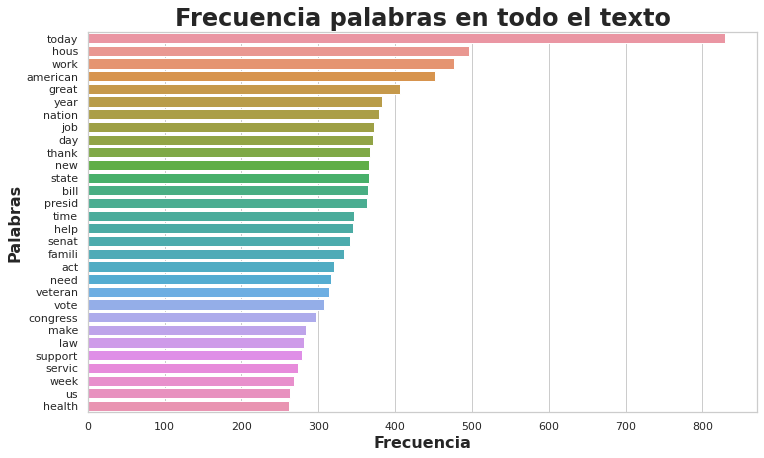

In [ ]:
#GRáfico de frecuencia de palabras
plt.figure(figsize=(12,7))
sns.set(style="whitegrid")
sns.barplot(y=m.Palabra, x=m.Frecuencia)
plt.title('Frecuencia palabras en todo el texto', weight='bold', size=24)
plt.xlabel('Frecuencia', weight='bold', size=16)
plt.ylabel('Palabras', weight='bold', size=16)
plt.show()


### Frecuencia de palabras  de la  Columna Usuario@



In [ ]:
cadena=""
for i in range(0, len(datos['Usuario@'])):
    cadena=cadena+" " + datos['Usuario@'][i]

In [ ]:
listaPalabras1=[]
listaPalabras1=cadena.split()
listaPalabras1

['@nowthisnew',
 '@senatorleahi',
 '@amazon',
 '@usdotfra',
 '@bbcworld',
 '@mha',
 '@genevrapittman',
 '@medcitynew',
 '@skitchp',
 '@corybook',
 '@senbookerofc',
 '@accesshealthct',
 '@ktvb',
 '@senatorreid',
 '@marcthiessen',
 '@uscapitol',
 '@houseofcard',
 '@flxwinecountri',
 '@niagwinetrail',
 '@politico',
 '@ftmeademd',
 '@askgeorg',
 '@edworkforcedem',
 '@grahamblog',
 '@lyndawoolard',
 '@aaa',
 '@fanniema',
 '@fixthedebt',
 '@thecankicksback',
 '@whitehous',
 '@repjoegarcia',
 '@wolfblitz',
 '@changinghand',
 '@foxmorningnew',
 '@jaketapp',
 '@freebeacon',
 '@rtenew',
 '@haroldmeyerson',
 '@washingtonpost',
 '@househomeland',
 '@mccaulpressshop',
 '@cbsthismorn',
 '@mayornoak',
 '@lewisunivers',
 '@seanhann',
 '@wyoguard',
 '@washingtonpost',
 '@mydesert',
 '@utahpoliticohub',
 '@matthewwymt',
 '@michellewymt',
 '@wymt',
 '@repsusandavi',
 '@',
 '@tenygross',
 '@hanscom',
 '@kevinscholla',
 '@repdavid',
 '@sarahnetradio',
 '@robbhanrahancb',
 '@cbs',
 '@johnerardi',
 '@red',
 

In [ ]:
len(listaPalabras1)

1865

In [ ]:
import collections
ocurrencias=collections.Counter(listaPalabras1)
print(ocurrencias)

Counter({'@': 48, '@speakerboehn': 17, '@washingtonpost': 13, '@whitehous': 11, '@foxnew': 11, '@usatoday': 9, '@wsj': 9, '@barackobama': 9, '@msnbc': 8, '@financialcmt': 8, '@thehil': 8, '@deptvetaffair': 8, '@corybook': 7, '@cnn': 6, '@housecommerc': 6, '@senrandpaul': 5, '@natresourc': 5, '@senblumenth': 5, '@nolabelsorg': 5, '@statedept': 5, '@waysandmeansgop': 5, '@usarmi': 5, '@grahamblog': 4, '@interior': 4, '@goplead': 4, '@senatorbarb': 4, '@huffpostpol': 4, '@roslehtinen': 4, '@facebook': 4, '@darrellissa': 4, '@repdesanti': 4, '@edshow': 4, '@peacecorp': 4, '@mariodb': 4, '@amyklobuchar': 4, '@nytim': 4, '@senatorleahi': 3, '@uscapitol': 3, '@virginiafoxx': 3, '@housegop': 3, '@appropsdem': 3, '@repduckworth': 3, '@senatedem': 3, '@repchrissmith': 3, '@stewsay': 3, '@repjeffdenham': 3, '@housesci': 3, '@loudobbsnew': 3, '@aldotcom': 3, '@senateapprop': 3, '@uschamb': 3, '@smallbizgop': 3, '@repjoseserrano': 3, '@meetthepress': 3, '@greggharp': 3, '@repmartharobi': 3, '@aipac

In [ ]:
ocurrencias.values()

dict_values([1, 3, 1, 2, 2, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 4, 1, 1, 2, 1, 1, 11, 1, 2, 1, 1, 2, 2, 1, 1, 13, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 48, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 17, 3, 1, 1, 1, 1, 4, 1, 4, 1, 1, 1, 1, 1, 1, 9, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 2, 3, 5, 2, 1, 2, 1, 4, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 2, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 11, 2, 3, 1, 1, 1, 1, 1, 2, 1, 3, 2, 2, 1, 1, 1, 1, 1, 3, 2, 1, 1, 3, 1, 2, 1, 8, 1, 2, 1, 1, 1, 8, 3, 1, 1, 1, 1, 2, 5, 1, 2, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 3, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 2, 9, 1, 1, 2, 1, 1, 4, 1, 2, 2

In [ ]:
Conteo_palabras1 = pd.DataFrame([[key, ocurrencias[key]] for key in ocurrencias.keys()], columns=['Palabra', 'Frecuencia']) #Crear un datafreame con la frecuencia de @

In [ ]:
Conteo_palabras1=Conteo_palabras1[Conteo_palabras1['Frecuencia']>1]
Conteo_palabras1 = Conteo_palabras1.sort_values('Frecuencia', ascending=False) #Ordenar de forma descendente
Conteo_palabras1

,Palabra,Frecuencia
52,@,48
77,@speakerboehn,17
38,@washingtonpost,13
177,@foxnew,11
29,@whitehous,11
...,...,...
493,@gretawir,2
495,@miamiherald,2
497,@reuter,2
121,@senwarren,2


In [ ]:
m = Conteo_palabras1.iloc[0:30,:]

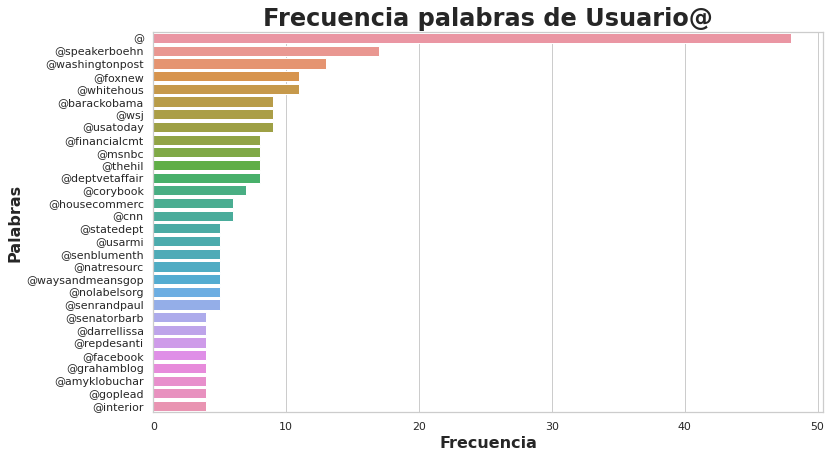

In [ ]:
#GRáfico de frecuencia de palabras
plt.figure(figsize=(12,7))
sns.set(style="whitegrid")
sns.barplot(y=m.Palabra, x=m.Frecuencia)
plt.title('Frecuencia palabras de Usuario@', weight='bold', size=24)
plt.xlabel('Frecuencia', weight='bold', size=16)
plt.ylabel('Palabras', weight='bold', size=16)
plt.show()

### Frecuencia de palabras  de la  Columna Etiqueta #

In [ ]:
cadena=""
for i in range(0, len(datos['Etiqueta#'])):
    cadena=cadena+" " + datos['Etiqueta#'][i]

In [ ]:
listaPalabras2=[]
listaPalabras2=cadena.split()
listaPalabras2

['#fl',
 '#obamacar',
 '#polit',
 '#obamacar',
 '#vawa',
 '#drone',
 '#innov',
 '#privaci',
 '#ua',
 '#casseltonderail',
 '#bringbackourgirl',
 '#joinrepwilson',
 '#fmla',
 '#hoyerheadlin',
 '#renewui',
 '#getenrol',
 '#defundobamacar',
 '#idpol',
 '#idaho',
 '#otd',
 '#actonclim',
 '#nca',
 '#yourtim',
 '#tx',
 '#wv',
 '#',
 '#energi',
 '#job',
 '#obamacar',
 '#renewui',
 '#trainwreck',
 '#scnew',
 '#florida',
 '#makegovernmentwork',
 '#problemsolv',
 '#fixnotfight',
 '#jerusalem',
 '#israel',
 '#gopbudget',
 '#wi',
 '#medicar',
 '#ope',
 '#gsereform',
 '#kxl',
 '#climatechang',
 '#kentucki',
 '#coleg',
 '#venezuela',
 '#sonyhack',
 '#colorado',
 '#thirteensoldi',
 '#temp',
 '#arizona',
 '#requireaplan',
 '#va',
 '#rke',
 '#bergdahl',
 '#ir',
 '#syria',
 '#ir',
 '#irsscand',
 '#benghazi',
 '#strikefastfood',
 '#boston',
 '#willcounti',
 '#fl',
 '#sayfi',
 '#vawa',
 '#obamacar',
 '#bahrain',
 '#cir',
 '#childcareprotect',
 '#utpol',
 '#lasen',
 '#rxdrugabus',
 '#art',
 '#landmin',
 '#t

In [ ]:
len(listaPalabras2)

2511

In [ ]:
import collections
ocurrencias=collections.Counter(listaPalabras2)
print(ocurrencias)

Counter({'#obamacar': 87, '#': 63, '#ir': 28, '#renewui': 26, '#ar': 24, '#job': 22, '#raisethewag': 22, '#tbt': 21, '#sotu': 21, '#benghazi': 20, '#veteran': 20, '#az': 20, '#tcot': 17, '#ca': 16, '#oh': 16, '#nsa': 15, '#vawa': 14, '#farmbil': 14, '#trainwreck': 13, '#timeisnow': 13, '#keystonexl': 13, '#idpol': 12, '#tx': 12, '#va': 12, '#syria': 12, '#aca': 12, '#pjnet': 12, '#budget': 12, '#gopshutdown': 11, '#fl': 10, '#dontdoublemyr': 10, '#ni': 10, '#il': 10, '#cuba': 10, '#bringbackourgirl': 9, '#cir': 9, '#immigr': 9, '#equalpay': 8, '#isi': 8, '#israel': 7, '#fairnessforal': 7, '#obama': 7, '#getcov': 7, '#nv': 7, '#timetobuild': 7, '#gop': 7, '#ff': 7, '#tn': 7, '#lgbt': 7, '#defundobamacar': 6, '#venezuela': 6, '#immigrationreform': 6, '#equal': 6, '#iran': 6, '#senatemustact': 6, '#mn': 6, '#hr': 6, '#scotus': 6, '#hobbylobbi': 6, '#nc': 6, '#potus': 6, '#mo': 6, '#veteransday': 6, '#nj': 6, '#neverforget': 6, '#wv': 5, '#gopbudget': 5, '#climatechang': 5, '#askdem': 5, '

In [ ]:
ocurrencias.values()

dict_values([10, 87, 1, 14, 1, 3, 1, 1, 1, 9, 4, 3, 2, 26, 1, 6, 12, 3, 2, 4, 2, 4, 12, 5, 63, 4, 22, 13, 1, 1, 1, 2, 2, 3, 7, 5, 4, 3, 1, 1, 2, 5, 4, 1, 6, 1, 3, 1, 1, 4, 2, 12, 1, 3, 28, 12, 4, 20, 1, 3, 1, 2, 1, 9, 1, 4, 3, 1, 3, 1, 17, 4, 3, 2, 1, 1, 1, 1, 2, 1, 13, 1, 4, 4, 4, 1, 1, 1, 2, 1, 6, 1, 1, 5, 1, 2, 3, 1, 16, 5, 5, 20, 2, 1, 1, 1, 1, 3, 2, 1, 2, 3, 1, 21, 5, 11, 1, 5, 14, 2, 10, 7, 1, 2, 10, 1, 2, 1, 1, 1, 7, 5, 22, 1, 2, 1, 1, 1, 6, 1, 7, 1, 1, 1, 1, 12, 2, 1, 1, 1, 1, 5, 1, 6, 2, 1, 1, 2, 16, 21, 12, 5, 1, 4, 4, 2, 3, 2, 10, 1, 1, 1, 12, 3, 3, 2, 6, 1, 1, 2, 1, 8, 1, 1, 1, 1, 5, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 4, 2, 1, 2, 1, 7, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 15, 1, 2, 1, 1, 1, 3, 8, 2, 4, 24, 1, 1, 1, 1, 1, 3, 1, 2, 3, 2, 1, 1, 5, 1, 1, 2, 1, 2, 5, 4, 1, 1, 1, 1, 1, 1, 9, 2, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 6, 3, 2, 1, 1, 1, 1, 3, 1, 5, 1, 1, 2, 4, 1, 1, 2, 1, 2, 13, 7, 1, 3, 1, 6, 1, 1, 1, 20, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 4, 1, 2, 1, 1, 1, 1, 2, 1, 

In [ ]:
Conteo_palabras2 = pd.DataFrame([[key, ocurrencias[key]] for key in ocurrencias.keys()], columns=['Palabra', 'Frecuencia']) #Crear un datafreame con la frecuencia de #

In [ ]:
Conteo_palabras2=Conteo_palabras2[Conteo_palabras2['Frecuencia']>1]
Conteo_palabras2 = Conteo_palabras2.sort_values('Frecuencia', ascending=False) #Ordenar de forma descendente
Conteo_palabras2

,Palabra,Frecuencia
1,#obamacar,87
24,#,63
54,#ir,28
13,#renewui,26
229,#ar,24
...,...,...
925,#onthisday,2
378,#newhaven,2
924,#bankonstud,2
755,#mi,2


In [ ]:
m = Conteo_palabras2.iloc[0:30,:]

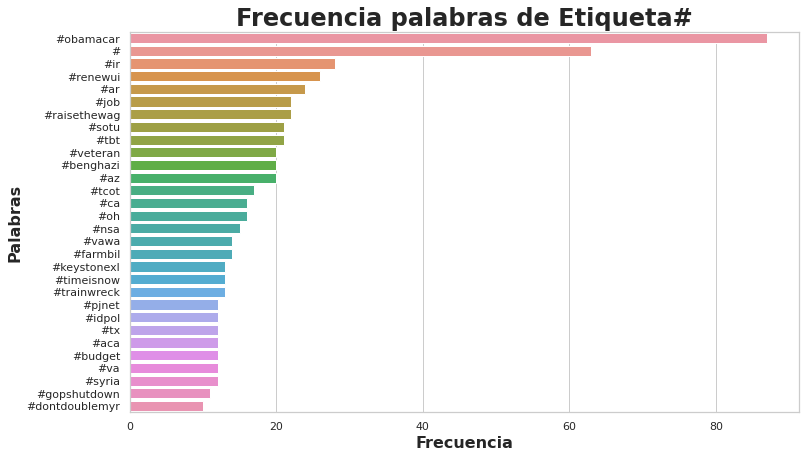

In [ ]:
#GRáfico de frecuencia de palabras
plt.figure(figsize=(12,7))
sns.set(style="whitegrid")
sns.barplot(y=m.Palabra, x=m.Frecuencia)
plt.title('Frecuencia palabras de Etiqueta#', weight='bold', size=24)
plt.xlabel('Frecuencia', weight='bold', size=16)
plt.ylabel('Palabras', weight='bold', size=16)
plt.show()

TOTAL DE PALABRAS DEL  TEXTO = 88426

TOTAL DE  PALABRAS USUARIOS@ = 1865 / PROP = 2.1%

TOTAL DE  PALABRAS ETIQUETA# = 2511 / PROP = 2.8%

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
count_vect = CountVectorizer(binary=True)
bow_rep = count_vect.fit_transform(datos.No_Stop1.values)

print("Vocabulario: ", count_vect.vocabulary_)

print(datos.iloc[0])
print(bow_rep[0].toarray())

#datos['bow'] = [row for row in bow_rep.toarray()]

Vocabulario:  {'rt': 6911, 'rep': 6671, 'trey': 8151, 'radel': 6441, 'slam': 7358, 'video': 8522, 'full': 3159, 'higher': 3719, 'cost': 1789, 'broken': 1023, 'promis': 6319, 'pleas': 6103, 'join': 4265, 'today': 8048, 'rememb': 6654, 'fallen': 2842, 'hero': 3695, 'honor': 3791, 'men': 5085, 'women': 8808, 'current': 1940, 'militari': 5172, 'servic': 7164, 'sacrific': 6945, 'st': 7549, 'step': 7613, 'toward': 8090, 'senat': 7138, 'debat': 2029, 'leahi': 4573, 'crapo': 1850, 'bill': 778, 'procedur': 6295, 'vote': 8574, 'pm': 6116, 'deliveri': 2105, 'show': 7270, 'need': 5437, 'updat': 8388, 'law': 4553, 'promot': 6321, 'protect': 6342, 'call': 1143, 'releas': 6641, 'info': 4024, 'inspect': 4057, 'review': 6757, 'qualiti': 6409, 'rail': 6449, 'help': 3678, 'us': 8408, 'keep': 4360, 'kidnap': 4394, 'nigerian': 5501, 'school': 7053, 'girl': 3303, 'stori': 7646, 'front': 3142, 'arizona': 420, 'pride': 6269, 'choos': 1405, 'favorit': 2886, 'az': 554, 'pictur': 6046, 'facebook': 2819, 'cover':

In [ ]:
m = count_vect.vocabulary_
m

{'rt': 6911,
 'rep': 6671,
 'trey': 8151,
 'radel': 6441,
 'slam': 7358,
 'video': 8522,
 'full': 3159,
 'higher': 3719,
 'cost': 1789,
 'broken': 1023,
 'promis': 6319,
 'pleas': 6103,
 'join': 4265,
 'today': 8048,
 'rememb': 6654,
 'fallen': 2842,
 'hero': 3695,
 'honor': 3791,
 'men': 5085,
 'women': 8808,
 'current': 1940,
 'militari': 5172,
 'servic': 7164,
 'sacrific': 6945,
 'st': 7549,
 'step': 7613,
 'toward': 8090,
 'senat': 7138,
 'debat': 2029,
 'leahi': 4573,
 'crapo': 1850,
 'bill': 778,
 'procedur': 6295,
 'vote': 8574,
 'pm': 6116,
 'deliveri': 2105,
 'show': 7270,
 'need': 5437,
 'updat': 8388,
 'law': 4553,
 'promot': 6321,
 'protect': 6342,
 'call': 1143,
 'releas': 6641,
 'info': 4024,
 'inspect': 4057,
 'review': 6757,
 'qualiti': 6409,
 'rail': 6449,
 'help': 3678,
 'us': 8408,
 'keep': 4360,
 'kidnap': 4394,
 'nigerian': 5501,
 'school': 7053,
 'girl': 3303,
 'stori': 7646,
 'front': 3142,
 'arizona': 420,
 'pride': 6269,
 'choos': 1405,
 'favorit': 2886,
 'az':

In [ ]:
s= len(m)
print ("la cantidad de palabras que hay en el vocabulario es de", s)

la cantidad de palabras que hay en el vocabulario es de 8952


In [ ]:
#datos['No_Stop'][0].append(datos['No_Stop'][1])
#datos['No_Stop'][0]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_distances

In [ ]:
len(datos['No_Stop1'].values)

5000

In [ ]:
tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(datos['No_Stop1'].values)
tfidf_matrix = pd.DataFrame(tfidf.toarray(), columns=tfidf_vect.get_feature_names())
tfidf_matrix.index = datos.index
tfidf_matrix=tfidf_matrix.T.round(3)
#tfidf_matrix.columns = datos['No_Stop1']
tfidf_matrix

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4960,4961,4962,4963,4964,4965,4966,4967,4968,4969,4970,4971,4972,4973,4974,4975,4976,4977,4978,4979,4980,4981,4982,4983,4984,4985,4986,4987,4988,4989,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
aaa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aamina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aanacounti,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aaoe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aapi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zip,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zone,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zoni,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zovhzlxckt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
tfidf_matrix.sum()

0       2.147
1       2.440
2       3.531
3       3.453
4       2.754
        ...  
4995    4.575
4996    5.722
4997    5.257
4998    3.072
4999    4.217
Length: 5000, dtype: float64

### Palabras comunes

In [ ]:
import collections

In [ ]:
count_vect = CountVectorizer()
bow_rep = count_vect.fit_transform(datos['No_Stop1'].values)
len(count_vect.vocabulary_)

8952

In [ ]:
datos.groupby('message').message.count().sort_values(ascending = False)

message
policy          1411
personal        1170
support          921
information      647
media            277
attack           172
constituency     152
mobilization     129
other            121
Name: message, dtype: int64

In [ ]:
collections.Counter(datos['No_Stop1'].str.cat(sep=" ").split()).most_common(10)

[('today', 830),
 ('hous', 496),
 ('work', 477),
 ('american', 452),
 ('great', 407),
 ('year', 383),
 ('nation', 379),
 ('job', 373),
 ('day', 371),
 ('thank', 367)]

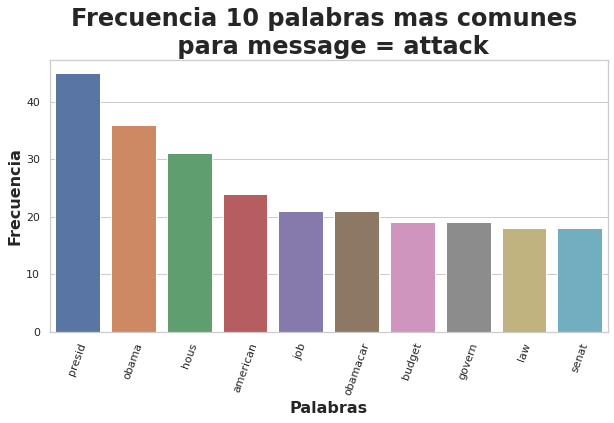

In [ ]:
attack = datos[datos['message'] == 'attack']
attack=collections.Counter(attack['No_Stop1'].str.cat(sep=" ").split()).most_common(10)      

plt.figure(figsize=(10,5))
sns.set(style="whitegrid")
sns.barplot(x=[val[0] for val in attack], y=[val[1] for val in attack])
plt.xticks(rotation=70)
plt.title('Frecuencia 10 palabras mas comunes \n para message = attack', weight='bold', size=24)
plt.ylabel('Frecuencia', weight='bold', size=16)
plt.xlabel('Palabras', weight='bold', size=16)
plt.show()

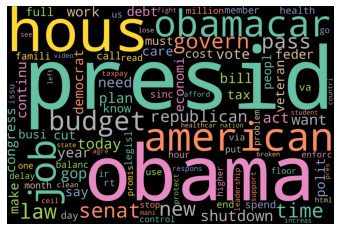

In [ ]:
from wordcloud import WordCloud

attackWC = datos[datos['message'] == 'attack']['No_Stop1'].values
attackWC=''.join(attackWC)

text=attackWC
wordcloud = WordCloud(background_color='black',width=3000, height=2000, max_words=100, random_state=1, colormap='Set2', collocations=False).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
attack

[('presid', 45),
 ('obama', 36),
 ('hous', 31),
 ('american', 24),
 ('job', 21),
 ('obamacar', 21),
 ('budget', 19),
 ('govern', 19),
 ('law', 18),
 ('senat', 18)]

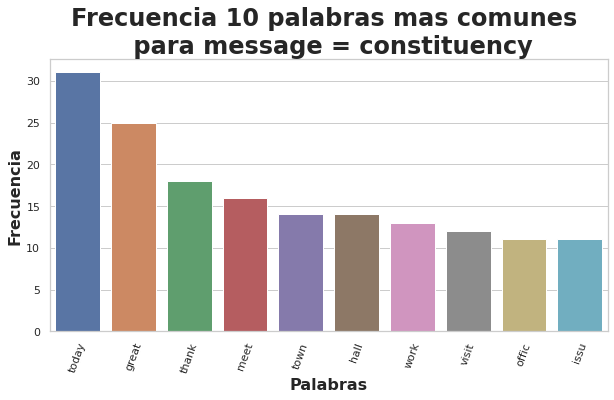

In [ ]:
constituency = datos[datos['message'] == 'constituency']
constituency = collections.Counter(constituency['No_Stop1'].str.cat(sep=" ").split()).most_common(10)

plt.figure(figsize=(10,5))
sns.set(style="whitegrid")
sns.barplot(x=[val[0] for val in constituency], y=[val[1] for val in constituency])
plt.xticks(rotation=70)
plt.title('Frecuencia 10 palabras mas comunes \n para message = constituency', weight='bold', size=24)
plt.ylabel('Frecuencia', weight='bold', size=16)
plt.xlabel('Palabras', weight='bold', size=16)
plt.show()

In [ ]:
import pickle
import matplotlib.pyplot as plt
from wordcloud import wordcloud, ImageColorGenerator
from PIL import Image
import random
from palettable.colorbrewer.sequential import Reds_9
from palettable.cmocean.diverging import Balance_20
from palettable.tableau import BlueRed_12
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
  return tuple(Balance_20.colors[random.randint(2,8)])

In [ ]:
constituency1 = datos[datos['message'] == 'constituency']
textos = ''.join(constituency1.fillna('')['No_Stop1'].tolist())
wc = WordCloud(background_color = "rgba(255, 255, 255, 0)", mode = "RGBA", width = 1800, height = 1400, max_words = 30).generate(textos)
wc.recolor(color_func=color_func,random_state=3)

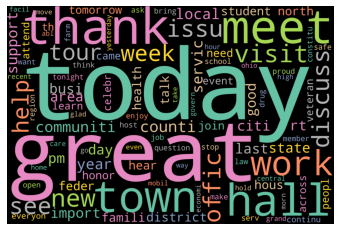

In [ ]:
from wordcloud import WordCloud

attackWC = datos[datos['message'] == 'constituency']['No_Stop1'].values
attackWC=''.join(attackWC)

text=attackWC
wordcloud = WordCloud(background_color='black',width=3000, height=2000, max_words=100, random_state=1, colormap='Set2', collocations=False).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

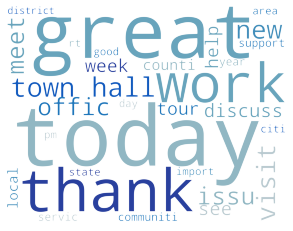

In [ ]:
plt.imshow(wc)
plt.axis("off")
plt.savefig('./x.png', dpi = 600)
plt.show()

In [ ]:
textos

" remind next week offic hold mobil offic hour sachs wyli learn thank li farm bureau host speak direct farmer issu import utah forc epa lower ozon level natur occur level great crowd town hall tonight thank came ask question great meet employe glad work nh thank scituat high school ap govern class today discuss civic engag futur state lot veteran own busi call th district home recent tour famili veteran own numer precis wheel thank employe visit op appreci thought economi feder spend met w manufactur extens partnership today discuss import manufactur nh economi studi climat socioeconom pattern caus trade move inland citi coastal citi central america scarborough beach launch sun smart public health campaign prevent w dermatologist great abl attend grand open lloyd hous menomine yesterday great visit pharmaci ohio morn learn work rt we'r lunch give us updat c take q chamber member ramada hote proud suit today tour kidney care mark tree facil w bob gallagh shalonda weatherspoon kick town 

In [ ]:
constituency

[('today', 31),
 ('great', 25),
 ('thank', 18),
 ('meet', 16),
 ('town', 14),
 ('hall', 14),
 ('work', 13),
 ('visit', 12),
 ('offic', 11),
 ('issu', 11)]

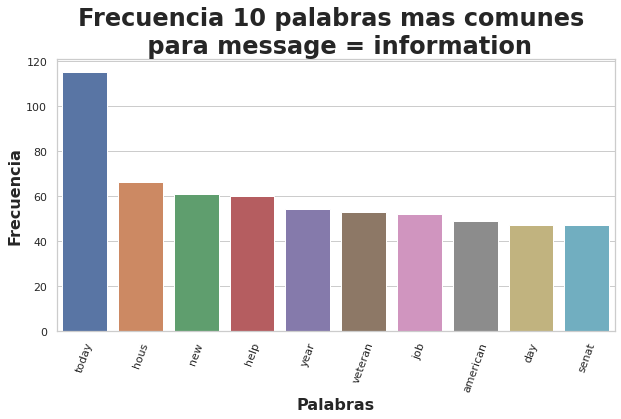

In [ ]:
information = datos[datos['message'] == 'information']
information = collections.Counter(information['No_Stop1'].str.cat(sep=" ").split()).most_common(10)

plt.figure(figsize=(10,5))
sns.set(style="whitegrid")
sns.barplot(x=[val[0] for val in information], y=[val[1] for val in information])
plt.xticks(rotation=70)
plt.title('Frecuencia 10 palabras mas comunes \n para message = information', weight='bold', size=24)
plt.ylabel('Frecuencia', weight='bold', size=16)
plt.xlabel('Palabras', weight='bold', size=16)
plt.show()

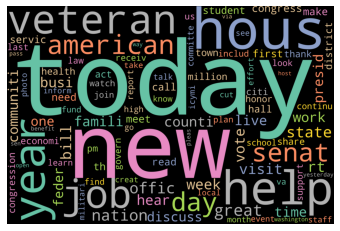

In [ ]:
from wordcloud import WordCloud

attackWC = datos[datos['message'] == 'information']['No_Stop1'].values
attackWC=''.join(attackWC)

text=attackWC
wordcloud = WordCloud(background_color='black',width=3000, height=2000, max_words=100, random_state=1, colormap='Set2', collocations=False).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
information 

[('today', 115),
 ('hous', 66),
 ('new', 61),
 ('help', 60),
 ('year', 54),
 ('veteran', 53),
 ('job', 52),
 ('american', 49),
 ('day', 47),
 ('senat', 47)]

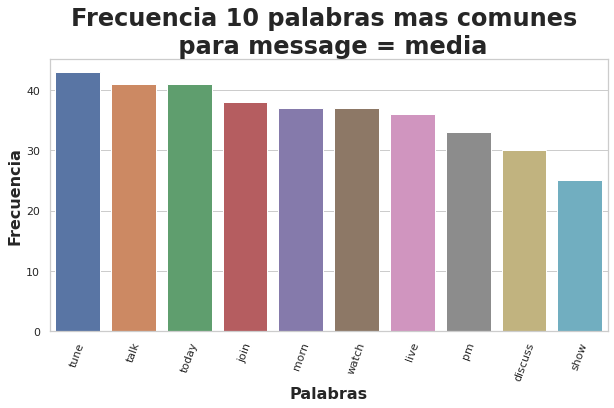

In [ ]:
media = datos[datos['message'] == 'media']
media = collections.Counter(media['No_Stop1'].str.cat(sep=" ").split()).most_common(10)

plt.figure(figsize=(10,5))
sns.set(style="whitegrid")
sns.barplot(x=[val[0] for val in media], y=[val[1] for val in media])
plt.xticks(rotation=70)
plt.title('Frecuencia 10 palabras mas comunes \n para message = media', weight='bold', size=24)
plt.ylabel('Frecuencia', weight='bold', size=16)
plt.xlabel('Palabras', weight='bold', size=16)
plt.show()

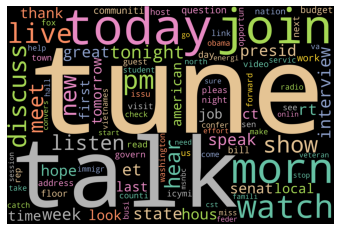

In [ ]:
from wordcloud import WordCloud

attackWC = datos[datos['message'] == 'media']['No_Stop1'].values
attackWC=''.join(attackWC)

text=attackWC
wordcloud = WordCloud(background_color='black',width=3000, height=2000, max_words=100, random_state=1, colormap='Set2', collocations=False).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
media

[('tune', 43),
 ('talk', 41),
 ('today', 41),
 ('join', 38),
 ('morn', 37),
 ('watch', 37),
 ('live', 36),
 ('pm', 33),
 ('discuss', 30),
 ('show', 25)]

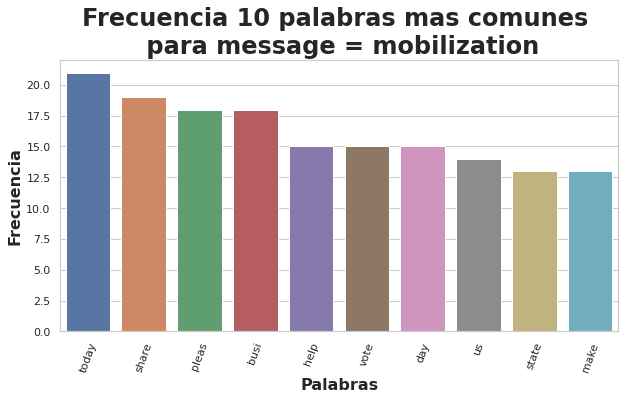

In [ ]:
mobilization = datos[datos['message'] == 'mobilization']
mobilization = collections.Counter(mobilization['No_Stop1'].str.cat(sep=" ").split()).most_common(10)

plt.figure(figsize=(10,5))
sns.set(style="whitegrid")
sns.barplot(x=[val[0] for val in mobilization], y=[val[1] for val in mobilization])
plt.xticks(rotation=70)
plt.title('Frecuencia 10 palabras mas comunes \n para message = mobilization', weight='bold', size=24)
plt.ylabel('Frecuencia', weight='bold', size=16)
plt.xlabel('Palabras', weight='bold', size=16)
plt.show()

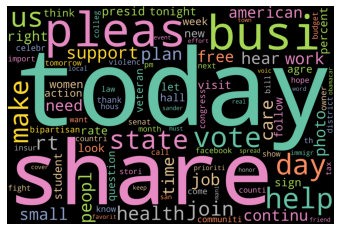

In [ ]:
from wordcloud import WordCloud

attackWC = datos[datos['message'] == 'mobilization']['No_Stop1'].values
attackWC=''.join(attackWC)

text=attackWC
wordcloud = WordCloud(background_color='black',width=3000, height=2000, max_words=100, random_state=1, colormap='Set2', collocations=False).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
mobilization

[('today', 21),
 ('share', 19),
 ('pleas', 18),
 ('busi', 18),
 ('help', 15),
 ('vote', 15),
 ('day', 15),
 ('us', 14),
 ('state', 13),
 ('make', 13)]

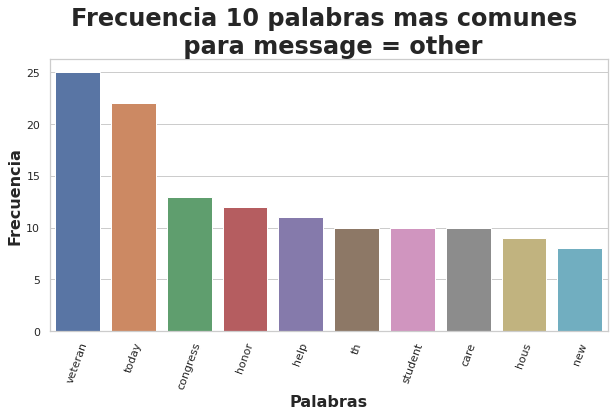

In [ ]:
other = datos[datos['message'] == 'other']
other = collections.Counter(other['No_Stop1'].str.cat(sep=" ").split()).most_common(10)

plt.figure(figsize=(10,5))
sns.set(style="whitegrid")
sns.barplot(x=[val[0] for val in other], y=[val[1] for val in other])
plt.xticks(rotation=70)
plt.title('Frecuencia 10 palabras mas comunes \n para message = other', weight='bold', size=24)
plt.ylabel('Frecuencia', weight='bold', size=16)
plt.xlabel('Palabras', weight='bold', size=16)
plt.show()

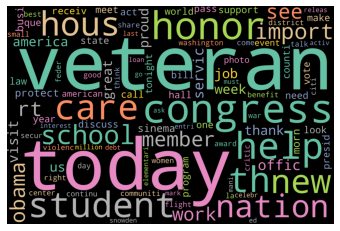

In [ ]:
from wordcloud import WordCloud

attackWC = datos[datos['message'] == 'other']['No_Stop1'].values
attackWC=''.join(attackWC)

text=attackWC
wordcloud = WordCloud(background_color='black',width=3000, height=2000, max_words=100, random_state=1, colormap='Set2', collocations=False).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
other

[('veteran', 25),
 ('today', 22),
 ('congress', 13),
 ('honor', 12),
 ('help', 11),
 ('th', 10),
 ('student', 10),
 ('care', 10),
 ('hous', 9),
 ('new', 8)]

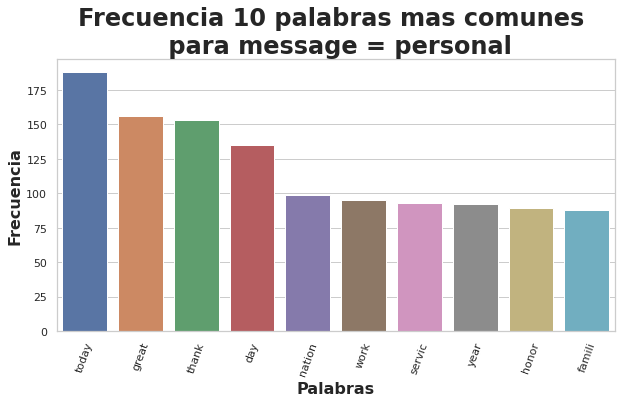

In [ ]:
personal = datos[datos['message'] == 'personal']
personal = collections.Counter(personal['No_Stop1'].str.cat(sep=" ").split()).most_common(10)

plt.figure(figsize=(10,5))
sns.set(style="whitegrid")
sns.barplot(x=[val[0] for val in personal], y=[val[1] for val in personal])
plt.xticks(rotation=70)
plt.title('Frecuencia 10 palabras mas comunes \n para message = personal', weight='bold', size=24)
plt.ylabel('Frecuencia', weight='bold', size=16)
plt.xlabel('Palabras', weight='bold', size=16)
plt.show()

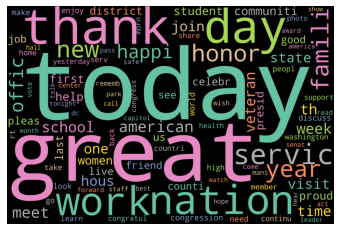

In [ ]:
from wordcloud import WordCloud

attackWC = datos[datos['message'] == 'personal']['No_Stop1'].values
attackWC=''.join(attackWC)

text=attackWC
wordcloud = WordCloud(background_color='black',width=3000, height=2000, max_words=100, random_state=1, colormap='Set2', collocations=False).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
personal

[('today', 188),
 ('great', 156),
 ('thank', 153),
 ('day', 135),
 ('nation', 99),
 ('work', 95),
 ('servic', 93),
 ('year', 92),
 ('honor', 89),
 ('famili', 88)]

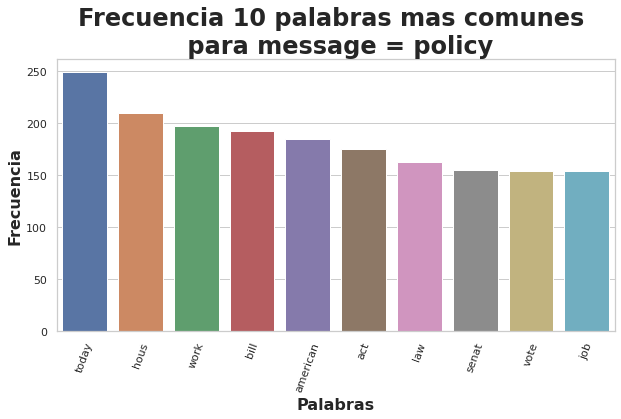

In [ ]:
policy = datos[datos['message'] == 'policy']
policy=collections.Counter(policy['No_Stop1'].str.cat(sep=" ").split()).most_common(10)

plt.figure(figsize=(10,5))
sns.set(style="whitegrid")
sns.barplot(x=[val[0] for val in policy], y=[val[1] for val in policy])
plt.xticks(rotation=70)
plt.title('Frecuencia 10 palabras mas comunes \n para message = policy', weight='bold', size=24)
plt.ylabel('Frecuencia', weight='bold', size=16)
plt.xlabel('Palabras', weight='bold', size=16)
plt.show()

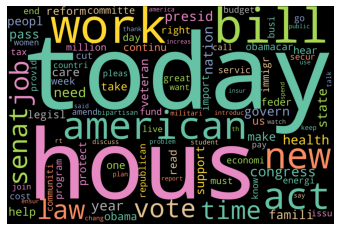

In [ ]:
from wordcloud import WordCloud

attackWC = datos[datos['message'] == 'policy']['No_Stop1'].values
attackWC=''.join(attackWC)

text=attackWC
wordcloud = WordCloud(background_color='black',width=3000, height=2000, max_words=100, random_state=1, colormap='Set2', collocations=False).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
policy

[('today', 249),
 ('hous', 210),
 ('work', 197),
 ('bill', 192),
 ('american', 185),
 ('act', 175),
 ('law', 163),
 ('senat', 155),
 ('vote', 154),
 ('job', 154)]

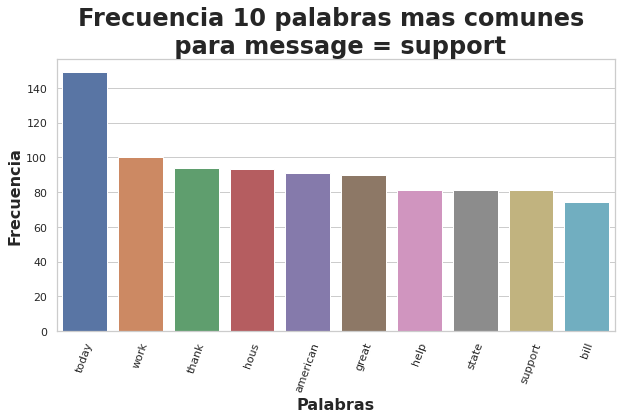

In [ ]:
support = datos[datos['message'] == 'support']
support=collections.Counter(support['No_Stop1'].str.cat(sep=" ").split()).most_common(10)

plt.figure(figsize=(10,5))
sns.set(style="whitegrid")
sns.barplot(x=[val[0] for val in support], y=[val[1] for val in support])
plt.xticks(rotation=70)
plt.title('Frecuencia 10 palabras mas comunes \n para message = support', weight='bold', size=24)
plt.ylabel('Frecuencia', weight='bold', size=16)
plt.xlabel('Palabras', weight='bold', size=16)
plt.show()

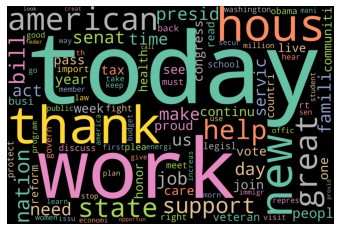

In [ ]:
from wordcloud import WordCloud

attackWC = datos[datos['message'] == 'support']['No_Stop1'].values
attackWC=''.join(attackWC)

text=attackWC
wordcloud = WordCloud(background_color='black',width=3000, height=2000, max_words=100, random_state=1, colormap='Set2', collocations=False).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
support

[('today', 149),
 ('work', 100),
 ('thank', 94),
 ('hous', 93),
 ('american', 91),
 ('great', 90),
 ('help', 81),
 ('state', 81),
 ('support', 81),
 ('bill', 74)]

## CLASIFICADORES

In [ ]:
datos.message.value_counts(normalize=True)

policy          0.2822
personal        0.2340
support         0.1842
information     0.1294
media           0.0554
attack          0.0344
constituency    0.0304
mobilization    0.0258
other           0.0242
Name: message, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

### Entrenamiento y prueba


In [ ]:
train, test = train_test_split(datos, test_size=0.2, random_state=42)

print(f"Tenemos {datos.shape[0]} datos en total.")
print(f"El conjunto de datos de entrenamiento (train) tiene {train.shape[0]} datos.")
print(f"El conjunto de datos de prueba (test) tiene {test.shape[0]} datos.")

Tenemos 5000 datos en total.
El conjunto de datos de entrenamiento (train) tiene 4000 datos.
El conjunto de datos de prueba (test) tiene 1000 datos.


In [ ]:
X_train = tfidf_vect.fit_transform(train.No_Stop1.values)
y_train = train.message.values

X_test = tfidf_vect.transform(test.No_Stop1.values)
y_test = test.message.values

print(f"Tamaño de X_train (entrenamiento): {pd.DataFrame(X_train.toarray()).shape}")
print(f"Tamaño de X_test (prueba): {pd.DataFrame(X_test.toarray()).shape}")
print(f"Tamaño de y_train {len(y_train)} y tamaño de y_test {len(y_test)}")

Tamaño de X_train (entrenamiento): (4000, 8049)
Tamaño de X_test (prueba): (1000, 8049)
Tamaño de y_train 4000 y tamaño de y_test 1000


In [ ]:
from sklearn.naive_bayes import MultinomialNB 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Inicializar los clasificadores
nb = MultinomialNB()
logreg = LogisticRegression(class_weight='balanced')
svm = LinearSVC(class_weight='balanced')
dt = DecisionTreeClassifier(class_weight='balanced')

### Modelos

In [ ]:
# Entrenamos los modelos
nb.fit(X_train, y_train)
logreg.fit(X_train, y_train)
svm.fit(X_train, y_train)
dt.fit(X_train, y_train);

In [ ]:
y_pred_nb = nb.predict(X_test)
y_pred_logreg = logreg.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_dt = dt.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

In [ ]:
#### Exactitud

print(f"Naive Bayes: {accuracy_score(y_test, y_pred_nb):>15.2f}")
print(f"Regresión Logística: {accuracy_score(y_test, y_pred_logreg):>7.2f}")
print(f"SVM: {accuracy_score(y_test, y_pred_svm):>23.2f}")
print(f"Árbol de decisión: {accuracy_score(y_test, y_pred_dt):>9.2f}")

Naive Bayes:            0.36
Regresión Logística:    0.33
SVM:                    0.30
Árbol de decisión:      0.28


In [ ]:
print("Naive Bayes")
print(classification_report(y_test, y_pred_nb))
print()

print("Regresión Logística")
print(classification_report(y_test, y_pred_logreg))
print()

print("SVM")
print(classification_report(y_test, y_pred_svm))
print()

print("Árbol de decisión")
print(classification_report(y_test, y_pred_dt))
print()


Naive Bayes
              precision    recall  f1-score   support

      attack       0.00      0.00      0.00        37
constituency       0.00      0.00      0.00        30
 information       0.00      0.00      0.00       140
       media       0.00      0.00      0.00        69
mobilization       0.00      0.00      0.00        29
       other       0.00      0.00      0.00        24
    personal       0.43      0.57      0.49       230
      policy       0.33      0.91      0.48       249
     support       0.40      0.01      0.02       192

    accuracy                           0.36      1000
   macro avg       0.13      0.17      0.11      1000
weighted avg       0.26      0.36      0.24      1000


Regresión Logística
              precision    recall  f1-score   support

      attack       0.15      0.35      0.21        37
constituency       0.11      0.20      0.14        30
 information       0.21      0.19      0.20       140
       media       0.43      0.59      0.50  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
%config InlineBackend.figure_format = 'svg'

Text(0.5, 1.0, 'Naive Bayes')

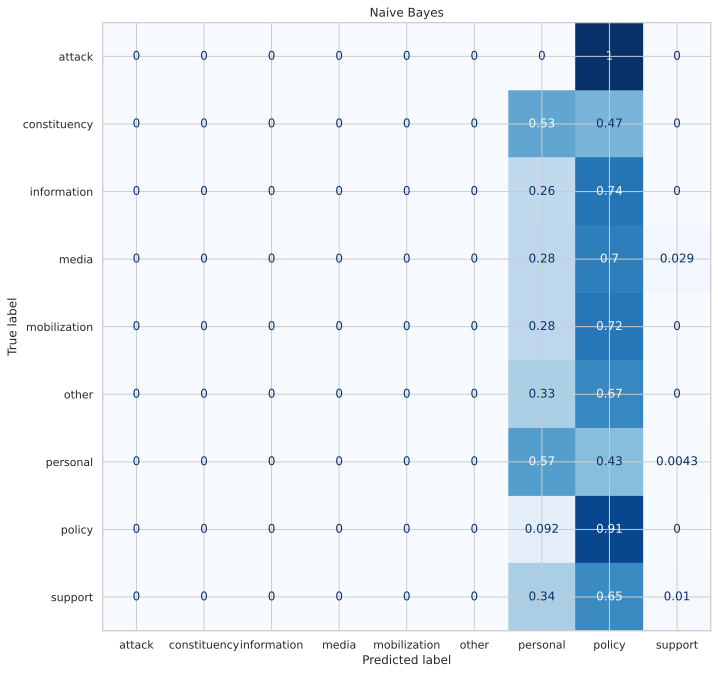

In [ ]:
fig = plt.figure(figsize=(30,30))

ax1 = fig.add_subplot(2,2,1)
plot_confusion_matrix(nb, X_test, y_test, cmap="Blues", ax=ax1, normalize='true').im_.colorbar.remove()
plt.title("Naive Bayes")


Text(0.5, 1.0, 'Regresión Logística')

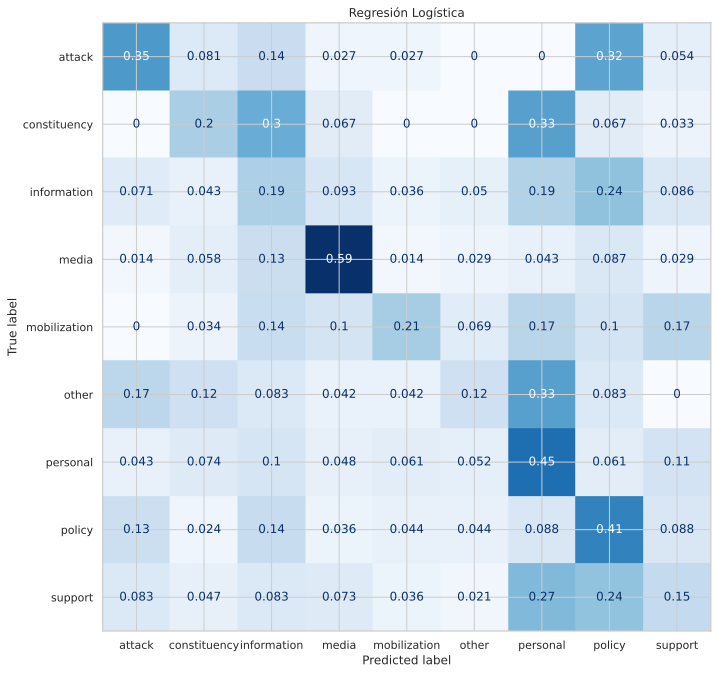

In [ ]:
fig = plt.figure(figsize=(30,30))
ax2 = fig.add_subplot(2,2,2)
plot_confusion_matrix(logreg, X_test, y_test, cmap = 'Blues', ax=ax2, normalize='true').im_.colorbar.remove()
plt.title("Regresión Logística")


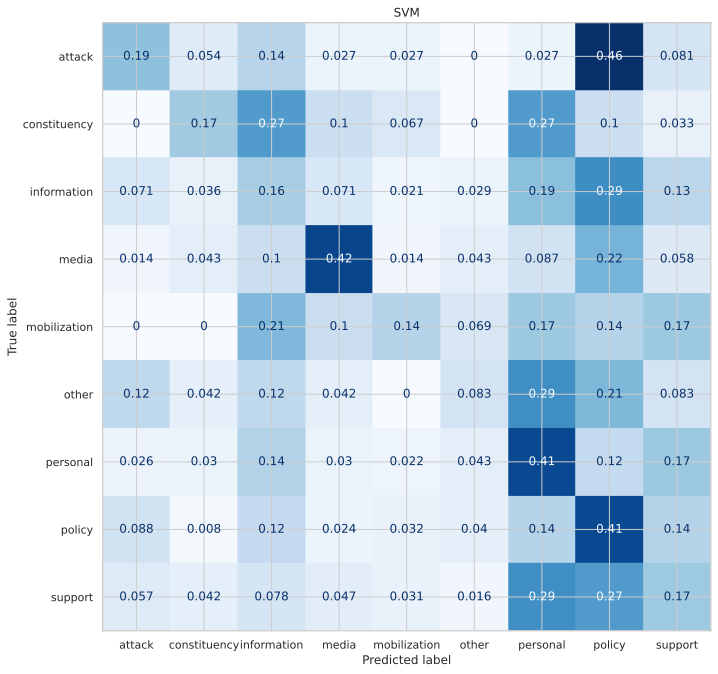

In [ ]:
fig = plt.figure(figsize=(30,30))
ax3 = fig.add_subplot(2,2,3)
plot_confusion_matrix(svm, X_test, y_test, cmap = 'Blues', ax=ax3, normalize='true').im_.colorbar.remove() 
plt.title("SVM");

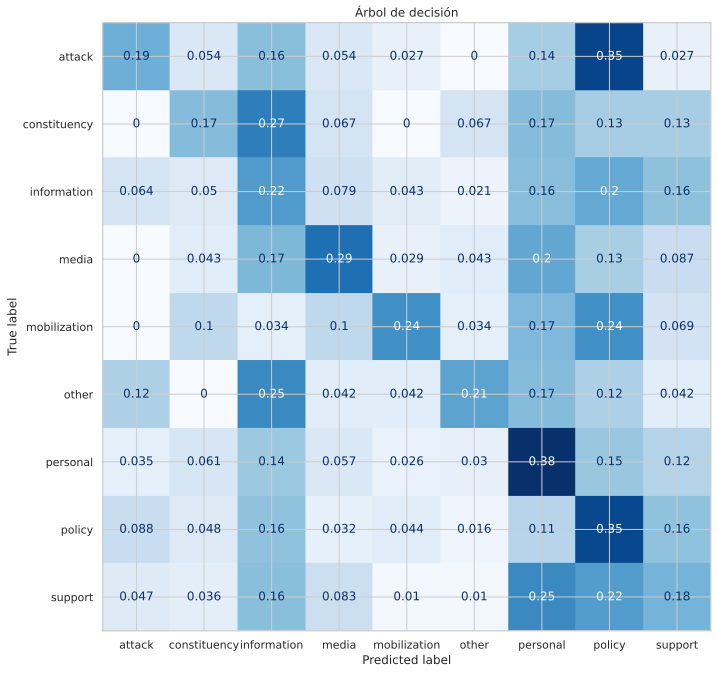

In [ ]:
fig = plt.figure(figsize=(30,30))
ax4 = fig.add_subplot(2,2,4)
plot_confusion_matrix(dt, X_test, y_test, cmap = 'Blues', ax=ax4, normalize='true').im_.colorbar.remove() 
plt.title("Árbol de decisión");

### Predicciones

In [ ]:
nuevos = ['Hello, my name is Diana?', 'I like the policy']
nuevos_trans = tfidf_vect.transform(nuevos)
nb.predict(nuevos_trans)

# nb.predict_proba(nuevos_trans)

array(['personal', 'policy'], dtype='<U12')

In [ ]:
logreg.predict(nuevos_trans)

array(['personal', 'personal'], dtype=object)

In [ ]:
svm.predict(nuevos_trans)


array(['media', 'support'], dtype=object)

In [ ]:
dt.predict(nuevos_trans)

array(['media', 'personal'], dtype=object)

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
model = RandomForestClassifier(n_estimators=1000)

In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
ypred = model.predict(X_test)

In [ ]:
from sklearn import metrics
print(metrics.classification_report(ypred, y_test))

              precision    recall  f1-score   support

      attack       0.00      0.00      0.00         1
constituency       0.00      0.00      0.00         1
 information       0.05      0.21      0.08        34
       media       0.29      0.56      0.38        36
mobilization       0.00      0.00      0.00         0
       other       0.00      0.00      0.00         1
    personal       0.63      0.40      0.49       362
      policy       0.83      0.38      0.52       540
     support       0.02      0.12      0.03        25

    accuracy                           0.38      1000
   macro avg       0.20      0.19      0.17      1000
weighted avg       0.69      0.38      0.48      1000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


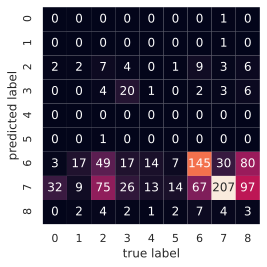

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

# Redes neuronales

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
clf = MLPClassifier(solver='adam', alpha=1e-5, activation='logistic', max_iter=5000,
                    hidden_layer_sizes=(3), random_state=1)

In [ ]:
clf = MLPClassifier(solver='adam', alpha=1e-5, activation='logistic', max_iter=5000,
                    hidden_layer_sizes=(3,3), random_state=1)

In [ ]:
clf.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(3, 3), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=5000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
y_pred_clf = clf.predict(X_test)

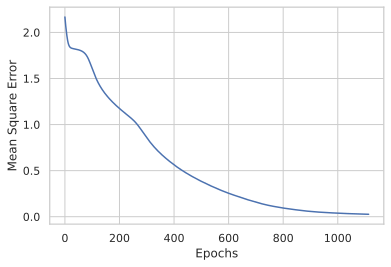

In [ ]:
plt.ylabel('Mean Square Error')
plt.xlabel('Epochs')
plt.plot(clf.loss_curve_)
plt.show()

In [ ]:
print(f"Redes neuronales: {accuracy_score(y_test, y_pred_clf):>9.2f}")

Redes neuronales:      0.22


In [ ]:
print("Modelo de red neuronal")
print(classification_report(y_test, y_pred_clf))
print()

Modelo de red neuronal
              precision    recall  f1-score   support

      attack       0.03      0.05      0.04        37
constituency       0.11      0.13      0.12        30
 information       0.14      0.08      0.10       140
       media       0.12      0.16      0.13        69
mobilization       0.06      0.07      0.07        29
       other       0.00      0.00      0.00        24
    personal       0.32      0.27      0.29       230
      policy       0.32      0.35      0.33       249
     support       0.21      0.22      0.21       192

    accuracy                           0.22      1000
   macro avg       0.14      0.15      0.14      1000
weighted avg       0.23      0.22      0.22      1000




Text(0.5, 1.0, 'Redes')

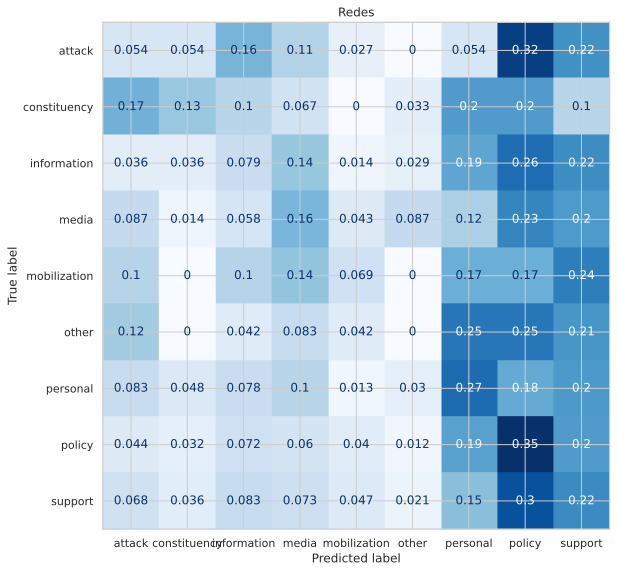

In [ ]:
fig = plt.figure(figsize=(25,25))

ax1 = fig.add_subplot(2,2,1)
plot_confusion_matrix(clf, X_test, y_test, cmap="Blues", ax=ax1, normalize='true').im_.colorbar.remove()
plt.title("Redes")

In [ ]:
nuevos = ['Hello, my name is Diana?', 'I like the policy']
nuevos_trans = tfidf_vect.transform(nuevos)
clf.predict(nuevos_trans)

array(['constituency', 'policy'], dtype='<U12')